In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/power_consumption_by_fuel_type.csv')


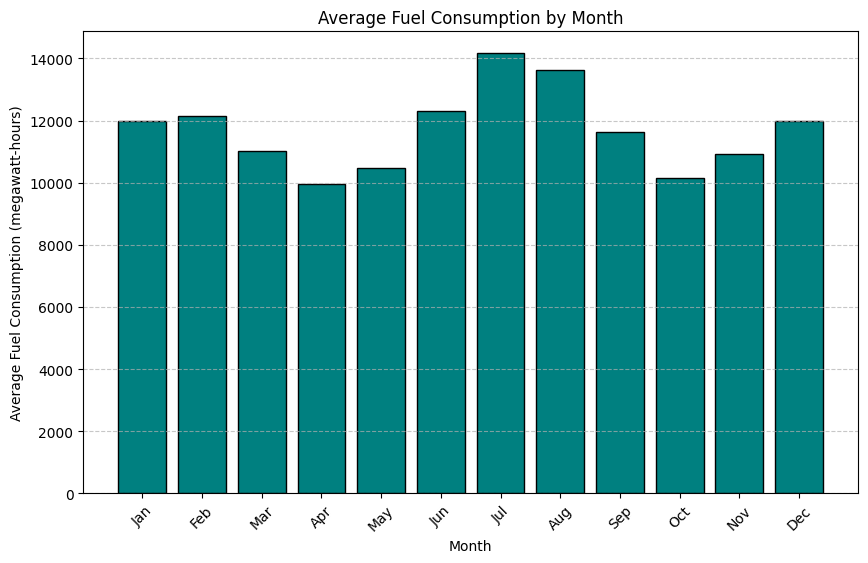

In [19]:
df['period'] = pd.to_datetime(df['period'])

df['month'] = df['period'].dt.month

monthly_avg_fuel_consumption = df.groupby('month')['value'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_fuel_consumption['month'], monthly_avg_fuel_consumption['value'], color='teal', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Fuel Consumption (megawatt-hours)')
plt.title('Average Fuel Consumption by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)








<Figure size 1200x600 with 0 Axes>

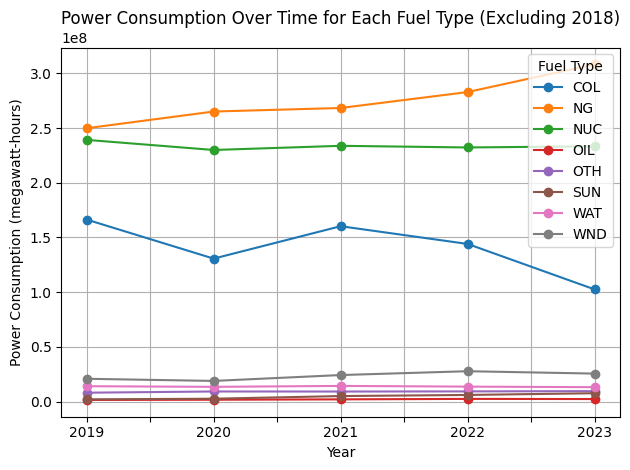

In [27]:
df['period'] = pd.to_datetime(df['period'])

df['year'] = df['period'].dt.year
df = df[df['year'] != 2018]

fuel_consumption_over_time = df.groupby(['fueltype', 'year'])['value'].sum().reset_index()

pivot_df = fuel_consumption_over_time.pivot(index='year', columns='fueltype', values='value')

pivot_df.index = pd.Categorical(pivot_df.index)

pivot_df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o', markersize=6)
plt.xlabel('Year')
plt.ylabel('Power Consumption (megawatt-hours)')
plt.title('Power Consumption Over Time for Each Fuel Type (Excluding 2018)')
plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()




/var/folders/pl/p83jjmd50j73j29mshg97d8c0000gn/T/ipykernel_75482/2353707896.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_power_consumption_by_time_of_day = df.groupby('time_of_day')['value'].mean().reindex(categories)


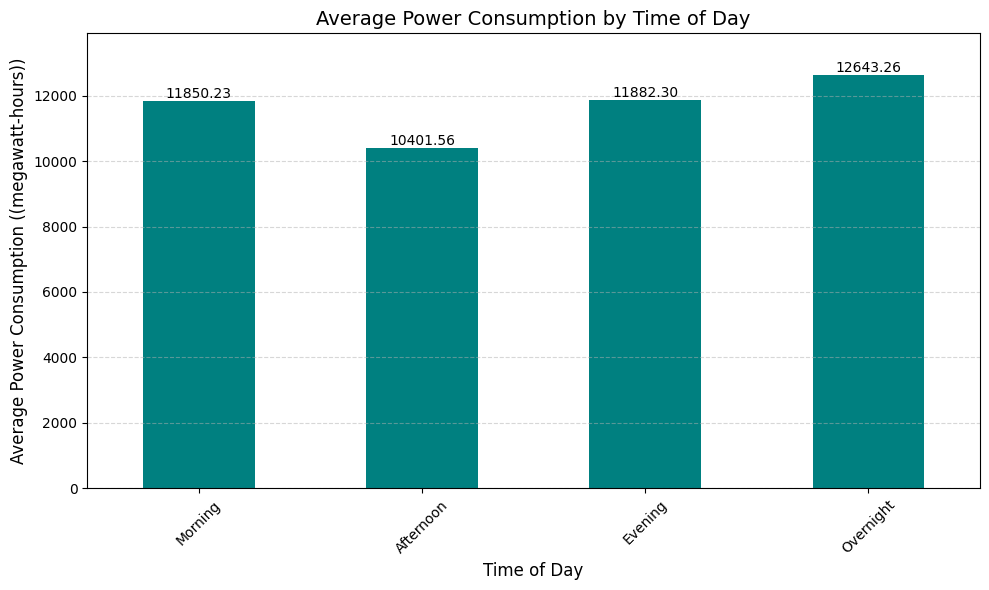

In [33]:
df['hour'] = df['period'].dt.hour
conditions = [
    (df['hour'] >= 5) & (df['hour'] < 11),
    (df['hour'] >= 11) & (df['hour'] < 17),
    (df['hour'] >= 17) & (df['hour'] < 23),
    (df['hour'] >= 23) | (df['hour'] < 5)
]
categories = ['Morning', 'Afternoon', 'Evening', 'Overnight']
df['time_of_day'] = pd.cut(df['hour'], bins=[0, 5, 11, 17, 24], labels=categories, right=False)

avg_power_consumption_by_time_of_day = df.groupby('time_of_day')['value'].mean().reindex(categories)

plt.figure(figsize=(10, 6))
avg_power_consumption_by_time_of_day.plot(kind='bar', color='teal', width=0.5)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Power Consumption ((megawatt-hours))', fontsize=12)
plt.title('Average Power Consumption by Time of Day', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(avg_power_consumption_by_time_of_day) * 1.1) 
plt.tight_layout()

for i, value in enumerate(avg_power_consumption_by_time_of_day):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


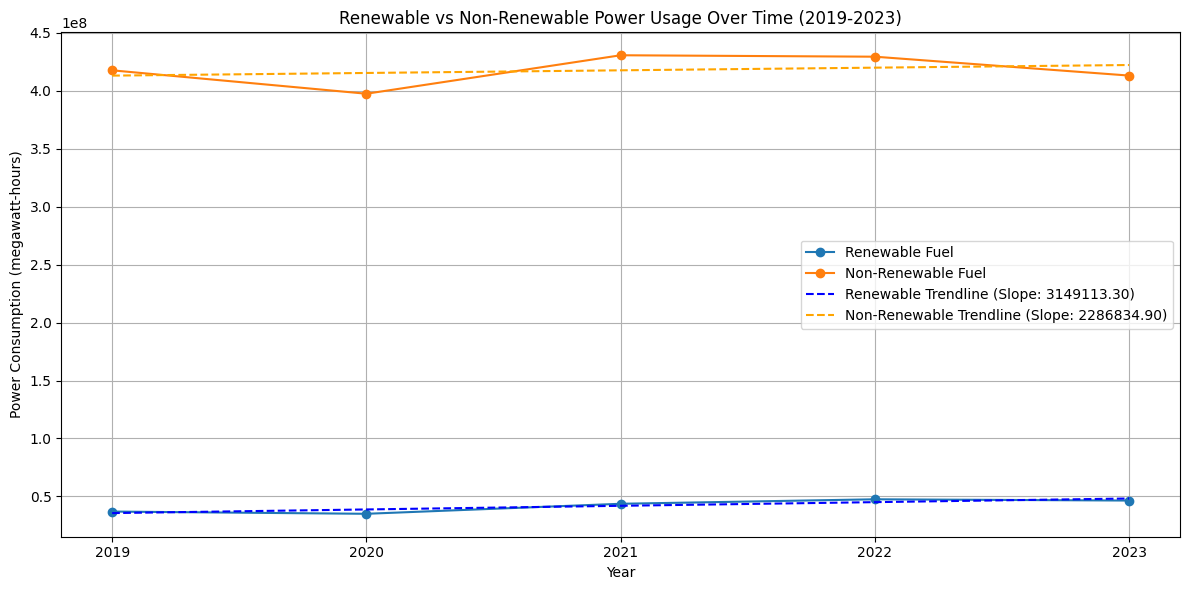

In [38]:
df['period'] = pd.to_datetime(df['period'])

df['year'] = df['period'].dt.year

renewable_fuels = ['SUN', 'WND', 'WAT']
non_renewable_fuels = ['COL', 'OIL', 'NG']

df_renewable = df[(df['year'] >= 2019) & (df['year'] <= 2023) & df['fueltype'].isin(renewable_fuels)]
df_non_renewable = df[(df['year'] >= 2019) & (df['year'] <= 2023) & df['fueltype'].isin(non_renewable_fuels)]

renewable_fuel_usage_over_time = df_renewable.groupby('year')['value'].sum().reset_index()
non_renewable_fuel_usage_over_time = df_non_renewable.groupby('year')['value'].sum().reset_index()

renewable_model = LinearRegression().fit(renewable_fuel_usage_over_time[['year']], renewable_fuel_usage_over_time['value'])
non_renewable_model = LinearRegression().fit(non_renewable_fuel_usage_over_time[['year']], non_renewable_fuel_usage_over_time['value'])

renewable_predicted = renewable_model.predict(renewable_fuel_usage_over_time[['year']])
non_renewable_predicted = non_renewable_model.predict(non_renewable_fuel_usage_over_time[['year']])

renewable_slope = renewable_model.coef_[0]
non_renewable_slope = non_renewable_model.coef_[0]

plt.figure(figsize=(12, 6))
plt.plot(renewable_fuel_usage_over_time['year'], renewable_fuel_usage_over_time['value'], marker='o', markersize=6, label='Renewable Fuel')
plt.plot(non_renewable_fuel_usage_over_time['year'], non_renewable_fuel_usage_over_time['value'], marker='o', markersize=6, label='Non-Renewable Fuel')
plt.plot(renewable_fuel_usage_over_time['year'], renewable_predicted, linestyle='--', color='blue', label=f'Renewable Trendline (Slope: {renewable_slope:.2f})')
plt.plot(non_renewable_fuel_usage_over_time['year'], non_renewable_predicted, linestyle='--', color='orange', label=f'Non-Renewable Trendline (Slope: {non_renewable_slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Power Consumption (megawatt-hours)')
plt.title('Renewable vs Non-Renewable Power Usage Over Time (2019-2023)')
plt.xticks(range(2019, 2024))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





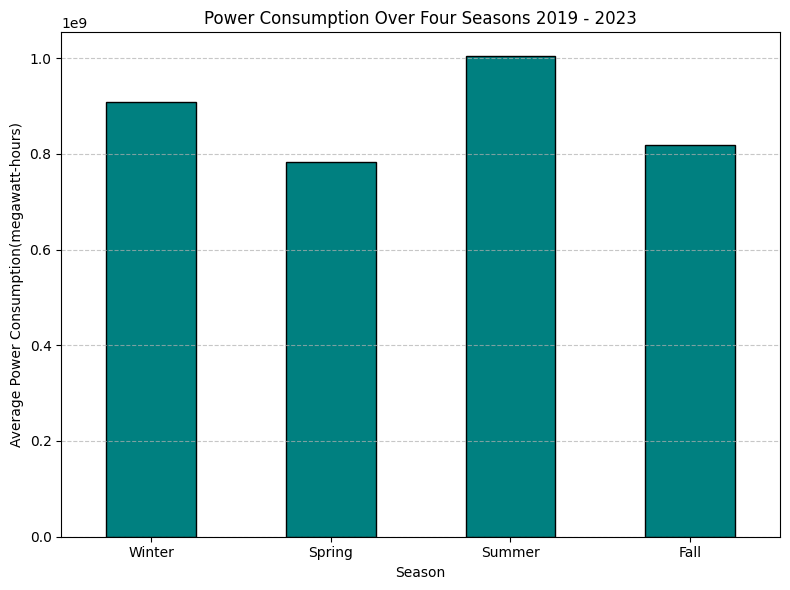

In [43]:
df['period'] = pd.to_datetime(df['period'])

df['month'] = df['period'].dt.month

def get_season(month):
    if month in [12, 1, 2]:  
        return 'Winter'
    elif month in [3, 4, 5]:  
        return 'Spring'
    elif month in [6, 7, 8]: 
        return 'Summer'
    else:  
        return 'Fall'

# Categorize periods into seasons
df['season'] = df['month'].apply(get_season)

seasonal_power_consumption = df.groupby('season')['value'].sum()

plt.figure(figsize=(8, 6))
seasonal_power_consumption[['Winter', 'Spring', 'Summer', 'Fall']].plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Season')
plt.ylabel('Average Power Consumption(megawatt-hours)')
plt.title('Power Consumption Over Four Seasons 2019 - 2023')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

